In [22]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
from paths import get_project_path

In [23]:
def parse_file(path_file):
    with open(path_file, 'rb') as f:
        data = f.readlines()
    voltage_list = []
    current_list = []
    for number, string in enumerate(data[8:]):
        clean_string = str(str(string).split("'")[1]).rstrip().strip().replace("\\n", '')
        voltage = clean_string.split(',')[0]
        current = clean_string.split(',')[1]
        voltage_list.append(float(voltage))
        current_list.append(float(current))
    tables, last_index = [], 0
    for i in range(len(voltage_list)):
        if (voltage_list[i] == 1.0) & (i != 0):
            tables.append(pd.DataFrame({'current': current_list[last_index:i],
                                        'voltage': voltage_list[last_index:i]}))
            last_index = i
    return tables

In [24]:
all_tables = []
all_labels = []
dir_path = os.path.join(get_project_path(), 'data', 'external', 'generated_dataset_version_1')
for file in tqdm(os.listdir(dir_path)):
    if file.endswith('all_solutions.txt'):
        low_conc = float(file.split("_")[1])
        high_conc = float(file.split("_")[2])
        for amount, one in enumerate(parse_file(os.path.join(dir_path, file))):
            all_tables.append(one)
        range_conc = np.linspace(low_conc, high_conc, num=amount + 1)
        for conc in range_conc:
            all_labels.append(conc)
print(len(all_tables))
print(len(all_labels))

100%|██████████| 13/13 [00:03<00:00,  4.27it/s]

6993
6993


In [25]:
lengths = []
for table in all_tables:
    if len(table) == 239:
        MINIMUM = table
    if len(table) == 280:
        MAXIMUM = table
    lengths.append(len(table))
max(lengths), min(lengths)

(280, 212)

248


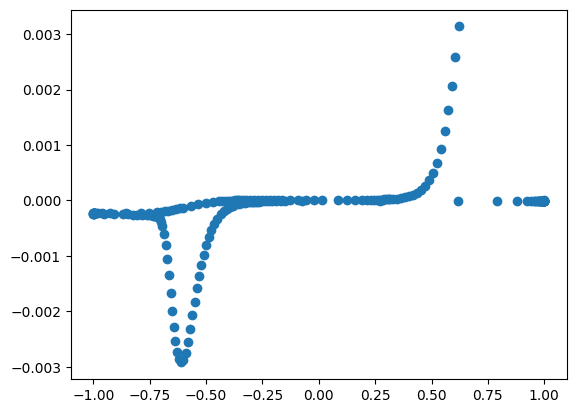

In [26]:
one = all_tables[2000]
slice = 200
print(len(one))
plt.scatter(one['voltage'][:slice], one['current'][:slice])

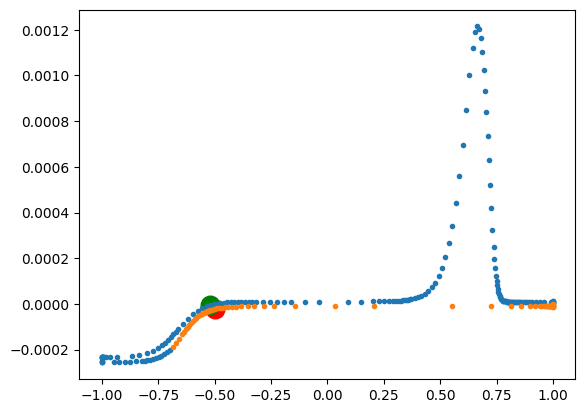

In [27]:
from scipy.interpolate import interp1d

for table in all_tables[1000:]:
    table = table.drop_duplicates(subset=['voltage'])
    low_index = [i for i, v in enumerate(table.voltage.tolist()[:80]) if v > -0.5][-1]
    high_index = [i for i, v in enumerate(table.voltage.tolist()[80:]) if v < -0.5][-1] + 80
    plt.scatter(table.voltage[low_index], table.current[low_index], c='red', s=180)
    plt.scatter(table.voltage[high_index], table.current[high_index], c='green', s=180)
    plt.scatter(table.voltage[80:], table.current[80:], marker='.')
    plt.scatter(table.voltage[:80], table.current[:80], marker='.')
    plt.show()
    break

In [158]:
from scipy.interpolate import interp1d


def interpolation_for_cycle(df: pd.DataFrame):
    difference = max(lengths) - len(df)
    if difference == 0:
        return df
    else:
        voltage = df.voltage.tolist()
        current = df.current.tolist()
        rounded_list = [round(v, 1) for v in voltage]
        index_new = 1
        cubic_interpolate_function = interp1d(voltage, current, kind='cubic')
        # x_new = np.linspace(-0.1, 0.50, num=difference, endpoint=True)
        x_new = np.linspace(voltage[0], voltage[-1], num=difference, endpoint=True)
        y_new = cubic_interpolate_function(x_new)
        for volt, curr in zip(x_new, y_new):
            voltage.insert(index_new, volt)
            current.insert(index_new, curr)
            index_new += 1
        return pd.DataFrame(data={'voltage': voltage, 'current': current})

In [159]:
result_rows = []
for num, table in enumerate(tqdm(all_tables)):
    result_rows.append(interpolation_for_cycle(table)['current'])
result = pd.DataFrame(data=result_rows)
result

100%|██████████| 6993/6993 [00:03<00:00, 2067.23it/s]


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
current,-2.584985e-24,-2.584985e-24,-0.000001,-0.000002,-0.000003,-0.000004,-0.000005,-0.000006,-0.000007,-0.000007,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584985e-24,-2.584985e-24,-0.000001,-0.000002,-0.000003,-0.000004,-0.000005,-0.000006,-0.000007,-0.000007,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584985e-24,-2.584985e-24,-0.000001,-0.000002,-0.000003,-0.000004,-0.000005,-0.000006,-0.000007,-0.000007,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584985e-24,-2.584985e-24,-0.000001,-0.000002,-0.000003,-0.000004,-0.000005,-0.000006,-0.000007,-0.000007,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584985e-24,-2.584985e-24,-0.000001,-0.000002,-0.000003,-0.000004,-0.000005,-0.000006,-0.000007,-0.000007,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
current,-2.584983e-24,-2.584983e-24,-0.000002,-0.000004,-0.000005,-0.000007,-0.000008,-0.000008,-0.000009,-0.000009,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584983e-24,-2.584983e-24,-0.000002,-0.000004,-0.000006,-0.000007,-0.000008,-0.000008,-0.000009,-0.000009,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584983e-24,-2.584983e-24,-0.000002,-0.000004,-0.000006,-0.000007,-0.000008,-0.000008,-0.000009,-0.000009,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003
current,-2.584983e-24,-2.584983e-24,-0.000002,-0.000004,-0.000006,-0.000007,-0.000008,-0.000008,-0.000009,-0.000009,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.000013,0.000013,0.000009,0.000003


257


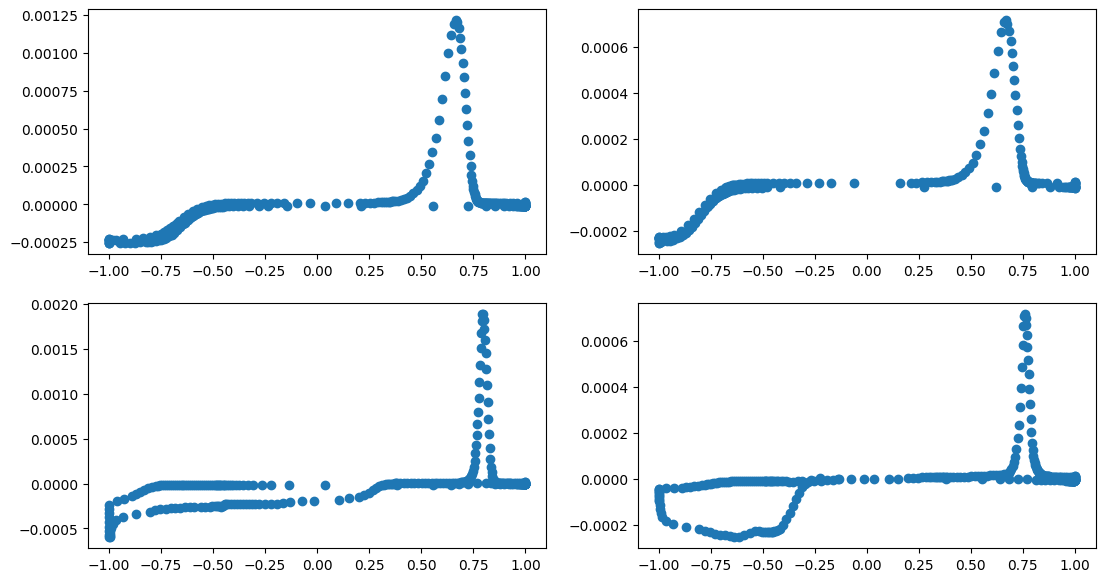

In [160]:
table_one = all_tables[1000]
plt.figure(figsize=(13, 7))
plt.subplot(2, 2, 1)
plt.scatter(table_one.voltage[:], table_one.current[:])
print(len(table_one))
plt.subplot(2, 2, 3)
plt.scatter(MAXIMUM.voltage, result.iloc[964][1:])
plt.subplot(2, 2, 2)
plt.scatter(all_tables[3450].voltage, all_tables[3450].current)
plt.subplot(2, 2, 4)
plt.scatter(MAXIMUM.voltage, result.iloc[3450][1:])